In [1]:
import pandas as pd
country_vaccinations_path = 'data/country_vaccinations.csv'

country_vaccinations = pd.read_csv(country_vaccinations_path)

In [6]:
# filter only iso code POL
country_vaccinations_pol = country_vaccinations[country_vaccinations['iso_code'] == 'POL']
seasoning_vaccinations_pl = country_vaccinations_pol.set_index('date')[['daily_vaccinations']]
seasoning_vaccinations_pl.dropna()

,daily_vaccinations
date,
2020-12-28,NaN
2020-12-29,4300.0
2020-12-30,17150.0
2020-12-31,15200.0
2021-01-01,11749.0
...,...
2022-03-25,16568.0
2022-03-26,14805.0
2022-03-27,14721.0


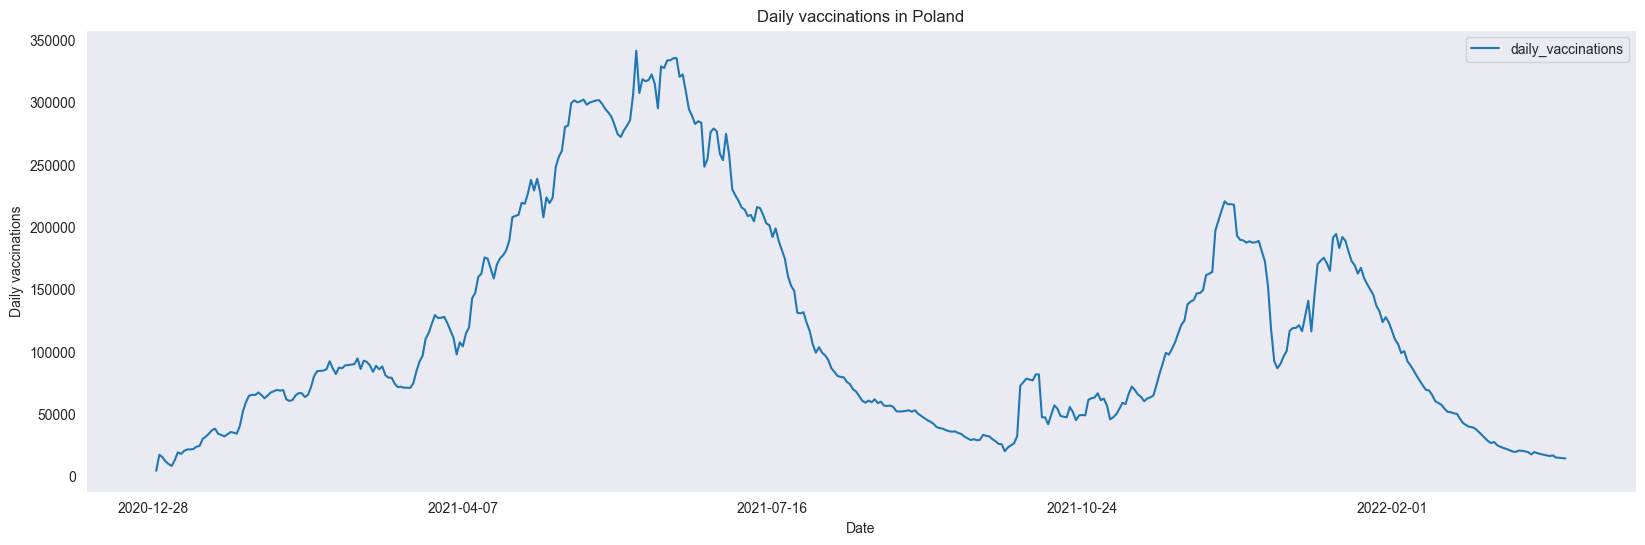

In [12]:
import matplotlib.pyplot as plt

seasoning_vaccinations_pl.plot(y='daily_vaccinations', figsize=(20,6), title="Daily vaccinations in Poland")

plt.xlabel('Date')
plt.ylabel('Daily vaccinations')
plt.grid()
plt.show()


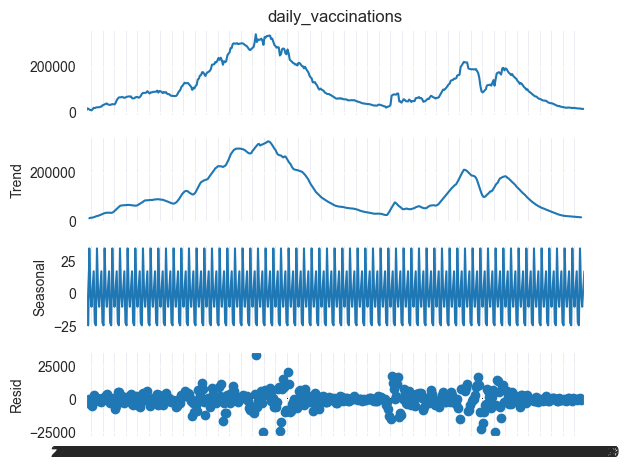

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(seasoning_vaccinations_pl['daily_vaccinations'].dropna(), model='additive', period=7)
result.plot()
plt.show()


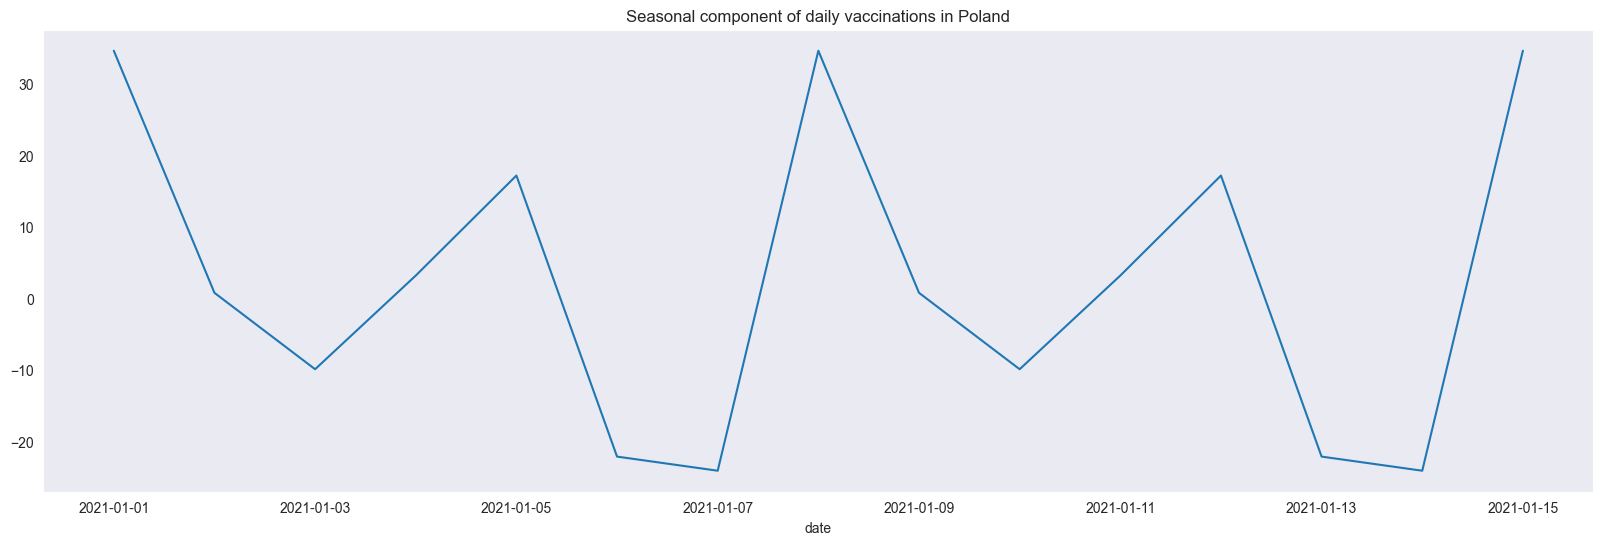

In [26]:
short_seasonal = result.seasonal['2021-01-01':'2021-01-15']
short_seasonal.plot(figsize=(20,6), title="Seasonal component of daily vaccinations in Poland")
plt.grid()
plt.show()

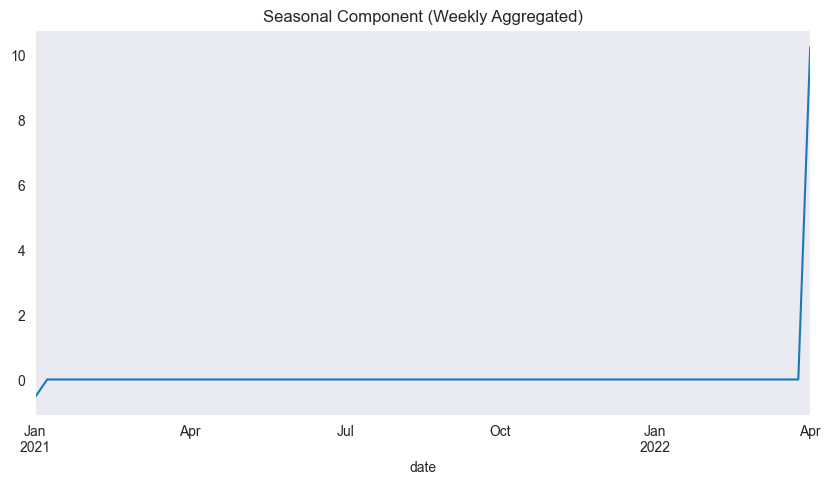

In [27]:
seasonal = result.seasonal.copy()
seasonal.index = pd.to_datetime(seasonal.index)

seasonal_weekly = seasonal.resample('W').mean()
seasonal_weekly.plot(title="Seasonal Component (Weekly Aggregated)", figsize=(10, 5))
plt.grid()
plt.show()

date
2020-12-29    17.214354
2020-12-30   -22.057967
2020-12-31   -24.031181
2021-01-01    34.657418
2021-01-02     0.828846
2021-01-03    -9.848146
2021-01-04     3.236676
2021-01-05    17.214354
2021-01-06   -22.057967
2021-01-07   -24.031181
Name: seasonal, dtype: float64
count    456.000000
mean       0.037751
std       19.545625
min      -24.031181
25%      -22.057967
50%        0.828846
75%       17.214354
max       34.657418
Name: seasonal, dtype: float64


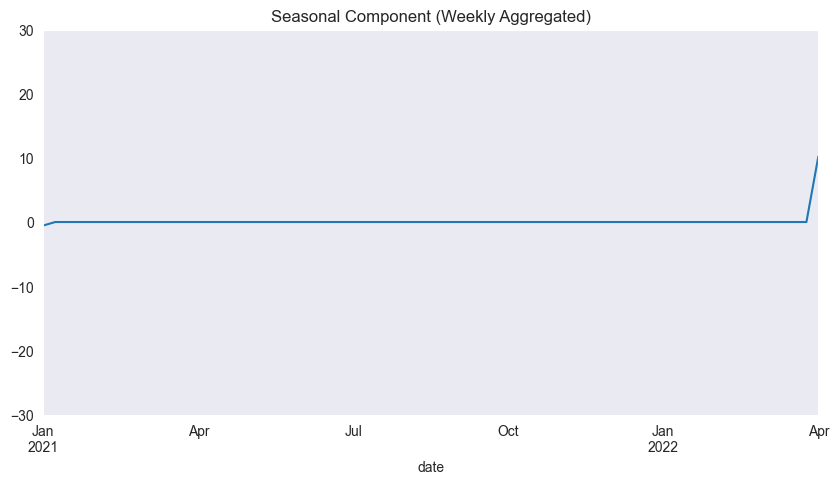

In [30]:
seasonal.index = pd.to_datetime(seasonal.index, errors='coerce')
print(seasonal.head(10))  # Zobacz pierwsze 10 wierszy
print(seasonal.describe())

seasonal_weekly.plot(title="Seasonal Component (Weekly Aggregated)", figsize=(10, 5))
plt.ylim(-30, 30)  # Dostosuj zakres do danych
plt.grid()
plt.show()

date
2021-01-03    -0.539446
2021-01-10     0.000000
2021-01-17     0.000000
2021-01-24     0.000000
2021-01-31     0.000000
                ...    
2022-03-06     0.000000
2022-03-13     0.000000
2022-03-20     0.000000
2022-03-27     0.000000
2022-04-03    10.225515
Freq: W-SUN, Name: seasonal, Length: 66, dtype: float64